# Algoritm inteligent + small data

### Cerinte laborator
* se va cauta un set de date mic care sa fie relevant pentru problema propusa - de preferat un set de date real dar mic (ex: 100-200 de exemple); se va descrie sursa datelor si modul in care au fost colectate; daca se foloseste un set de date real, se vor respecta toate regulile etice si legale privind utilizarea datelor (ex: GDPR, drepturi de autor, etc.)
& se va alege un algoritm de AI (machine learning/deep learning) care sa rezolve problema propusa; se va implementa si antrena un model folosind un set mic de date (small data) - de exemplu, un set de date sintetic, sau un set de date real dar mic (ex: 100-200 de exemple); se poate porni antrenarea de la 0 sau se poate folosi transfer learning (pornind de la un model pre-antrenat pe un set de date similar cu cel folosit in proiect)
* Descriere si scurta EDA a datelor
* Descriere algoritm inteligent - se va descrie pe scurt algoritmul ales, motivatia alegerii lui, librariile folosite, etc.
* Descriere metodologie experimentala si rezultate obtinute - se vor descrie detalii precum:
* cum s-a impartit setul mic de date (train/val/test),
* ce metrici s-au folosit pentru evaluare,
* ce hiperparametri s-au folosit,
* ce rezultate s-au obtinut (metrici + cateva exemple corect/gresit prezise)

# Dataset

Am folosit un set de date relativ mic, care contine informatii despre unele boli si simptomele asociate acestora. Setul de date este format din 17 simptome si un numar de boli, fiecare boala avand un set de simptome. Obiectivul este sa construim un model care sa prezica boala pe baza simptomelor prezentate.

# Prelucrarea datelor

* Simptomele sunt codificate in format binar (1 pentru simptom prezent, 0 pentru simptom absent)
* Eticheta boala este codificata cu ajutorul unui LabelEncoder in valori numerice pentru a fi utilizata de catre modelul de invatare automata.
* Verificarea dimensiunilor si primelor randuri date, precum si posibilele valori lipsa.
* Transforma fiecare coloana de simptome in variabile binare
* Cream X (features) - simptome si y (label) - boli.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('DiseaseAndSymptoms.csv')

df.fillna(0, inplace=True)

symptom_columns = [f"Symptom_{i}" for i in range(1, 18)]

X = df[symptom_columns].apply(lambda x: x.apply(lambda val: 1 if isinstance(val, str) and val != '0' else 0))
print(X.head())

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Disease'])

print("\nDistributia bolilor:\n")
(unique, counts) = np.unique(y, return_counts=True)
for u, c in zip(unique, counts):
    print(f"{label_encoder.inverse_transform([u])[0]}: {c}")

   Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0          1          1          1          1          0          0   
1          1          1          1          0          0          0   
2          1          1          1          0          0          0   
3          1          1          1          0          0          0   
4          1          1          1          0          0          0   

   Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           0           0   

   Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0           0           0           0           0           0  


Desi avem un numar egal de exemple pentru fiecare boala, setul de date fiind echilibrat din acest punct de vedere, complexitatea datelor il fac sa fie cu adevarat dezechilibrat.

* Impartim setul de date in training si test (80% training, 20% test)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

Logistic Regression este un algoritm de clasificare utilizat in machine learning, care prezice probabilitatea ca un exemplu sa apartina unei clase.
In cazul de fata, (problema este multi-clasa), vom folosi extensia "one-vs-rest".
Modelul invata un set de coeficienti care determina cat de mult fiecare feature (simptom) contribuie la probabilitatea ca exemplul sa apartina unei clase.

## Motivatia alegerii:
* Datele noastre sunt un small data. Logistic Regression nu necesita foarte multe date pentru a functiona.
* Setul de date este echilibrat, ceea ce ajuta modelul sa invete bine fiecare clasa.
* Simptomele sunt codificate binar (0/1) -> Logistic Regression poate trata usor aceste date.

## Posibile dezavantaje:
* Modelul poate fi afectat de coliniaritate intre features (cand doua simptome sunt foarte corelate).
* Nu captureaza relatii non-lineare complexe intre caracteristici

# Antrenarea modelului

Antrenam un model de Logistic Regression cu un numar maxim de iteratii pentru optimizare, folosim extensia "one-vs-rest" pentru clasificarea multi-clasa, iar pentru a optimiza functia de cost si a gasi coeficientii modelului vom folosi solverul 'lbfgs', fiind cel mai recomandat pentru multi-clasa.

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Primele 10 predicții:", y_pred[:10])
print("Primele 10 etichete reale:", y_test[:10])

Primele 10 predicții: [15 38 37 38  9  5 25 38 25 21]
Primele 10 etichete reale: [ 2  2 24  1  9 23 25  5 19 30]


/Users/alexcostan/Documents/FACULTATE/MIRPR/TEMA2/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


# Evaluarea performantei

Evaluam modelul folosind raportul de clasificare si matricea de confuzie

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00        18
                                   AIDS       0.00      0.00      0.00        30
                                   Acne       0.00      0.00      0.00        24
                    Alcoholic hepatitis       0.00      0.00      0.00        25
                                Allergy       0.00      0.00      0.00        24
                              Arthritis       0.07      0.52      0.12        23
                       Bronchial Asthma       0.00      0.00      0.00        33
                   Cervical spondylosis       0.00      0.00      0.00        23
                            Chicken pox       0.00      0.00      0.00        21
                    Chronic cholestasis       0.17      0.60      0.27        15
                            Common Cold       1.00      0.57      0.72        23
                           

/Users/alexcostan/Documents/FACULTATE/MIRPR/TEMA2/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/alexcostan/Documents/FACULTATE/MIRPR/TEMA2/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/alexcostan/Documents/FACULTATE/MIRPR/TEMA2/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to co

Modelul a scos o acuratete de 18%. Ii putem imbunatati performanta prin ajustarea hiperparametrilor, preprocesare mai avansata sau augumentarea datelor.


Matplotlib is building the font cache; this may take a moment.


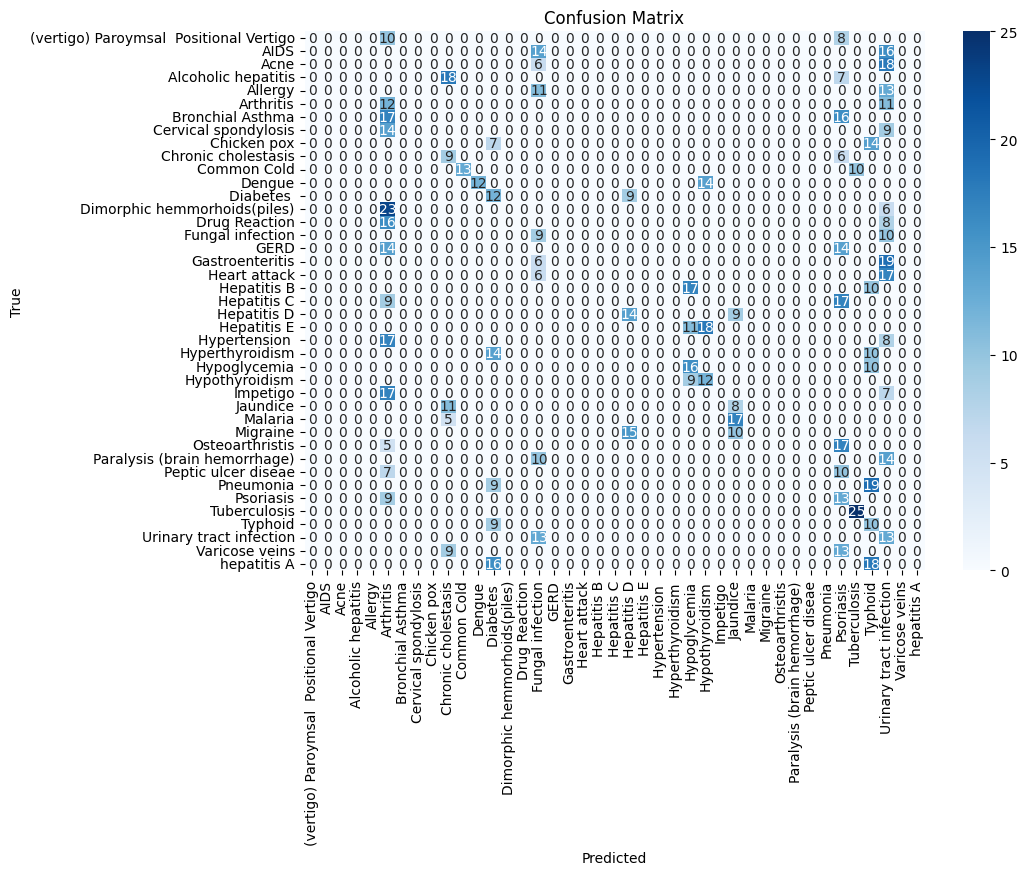

In [10]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Aplicarea unor imbunatatiri

* Folosim OneVsRestClassifier
* Scalam datele
* Folosim GridSearchCv pentru optimizare

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

base_model = LogisticRegression(solver='lbfgs', class_weight='balanced')

ovr_model = OneVsRestClassifier(base_model)

param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__max_iter': [500, 1000, 1500, 2000]
}

grid_search = GridSearchCV(
    ovr_model,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

y_pred_best = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_, zero_division=0))

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print("Mean CV score:", cv_scores.mean())



Best parameters: {'estimator__C': 0.01, 'estimator__max_iter': 500}
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00        18
                                   AIDS       0.00      0.00      0.00        30
                                   Acne       0.00      0.00      0.00        24
                    Alcoholic hepatitis       0.00      0.00      0.00        25
                                Allergy       0.00      0.00      0.00        24
                              Arthritis       0.07      0.52      0.12        23
                       Bronchial Asthma       0.00      0.00      0.00        33
                   Cervical spondylosis       0.00      0.00      0.00        23
                            Chicken pox       0.00      0.00      0.00        21
                    Chronic cholestasis       0.17      0.60      0.27        15
                            Common Cold 